In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd
import sqlite3
conn = sqlite3.connect(r'D:\Weiterbildung - Data Analyst\Fabian Dozent\Woche 15 (01.12.2023)\NYCTaxis.db') 

query = "SELECT * FROM NYCTaxis"  
df = pd.read_sql_query(query, conn)
conn.close()

In [3]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [7]:
# Passagierenanzahl warum und wo ist 0 und wann oder wohin gefahren??!
# trip_duration ist nur 1 Sekunde?! warum und wann oder wohin gefahren?

In [8]:
df.trip_duration.min()

1

In [9]:
df.columns.to_list()

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

- `id`: Eindeutige Kennung für jede Taxifahrt


- `vendor_id`: ID des Taxiunternehmens




- `dropoff_datetime`: Zeitpunkt der Absetzung


- `passenger_count`: Anzahl der Passagiere


- `pickup_longitude`: Längengrad des Abholungsortes


- `pickup_latitude`: Breitengrad des Abholungsortes


- `dropoff_longitude`: Längengrad des Zielorts




- `dropoff_latitude`: Breitengrad des Zielorts


- `store_and_fwd_flag`: Kennzeichnung, ob die Fahrt zwischengespeichert und später übertragen wurde


- `trip_duration`: Dauer der Taxifahrt in Sekunden

In [10]:
import pandas as pd 
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
vendor_id,1458644.0,1.53495,1.0,1.0,2.0,2.0,2.0,0.498777
pickup_datetime,1458644,2016-04-01 10:10:24.940037120,2016-01-01 00:00:17,2016-02-17 16:46:04.249999872,2016-04-01 17:19:40,2016-05-15 03:56:08.750000128,2016-06-30 23:59:39,NaN
dropoff_datetime,1458644,2016-04-01 10:26:24.432310528,2016-01-01 00:03:31,2016-02-17 17:05:32.500000,2016-04-01 17:35:12,2016-05-15 04:10:51.750000128,2016-07-01 23:02:03,NaN
passenger_count,1458644.0,1.66453,0.0,1.0,1.0,2.0,9.0,1.314242
pickup_longitude,1458644.0,-73.973486,-121.933342,-73.991867,-73.981743,-73.967331,-61.335529,0.070902
pickup_latitude,1458644.0,40.750921,34.359695,40.737347,40.754101,40.76836,51.881084,0.032881
dropoff_longitude,1458644.0,-73.973416,-121.933304,-73.991325,-73.979752,-73.963013,-61.335529,0.070643
dropoff_latitude,1458644.0,40.7518,32.181141,40.735885,40.754524,40.76981,43.921028,0.035891
trip_duration,1458644.0,959.492273,1.0,397.0,662.0,1075.0,3526282.0,5237.431724


Hinweis: es gibt Bibliotheken für die Arbeit mit geografischen Daten bspw.: 


geopy -> pip install geopy 


Hinweis: Du kannst die Distanzen berechnen, indem du "pickup_latitude" & "pickup_longitude" sowie "dropoff_latitude" & "dropoff_longitude" verwendest
nachdem du geopy installiert hast: 
 
from geopy.distance import geodesic

In [13]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [14]:
from geopy.distance import geodesic as GD


In [15]:
#ZB:

from geopy.distance import geodesic as GD

pickup_coords = (df['pickup_latitude'][0], df['pickup_longitude'][0])
dropoff_coords = (df['dropoff_latitude'][0], df['dropoff_longitude'][0])

distance = GD(pickup_coords, dropoff_coords).km  
print(f"Die Distanz der ersten Fahrt beträgt: {distance:.2f} KM")


Die Distanz der ersten Fahrt beträgt: 1.50 KM


#### 1. Anzahl der Fahrten mit Passagieranzahl 0 nach Taxiunternehmen und store_and_fwd_flag


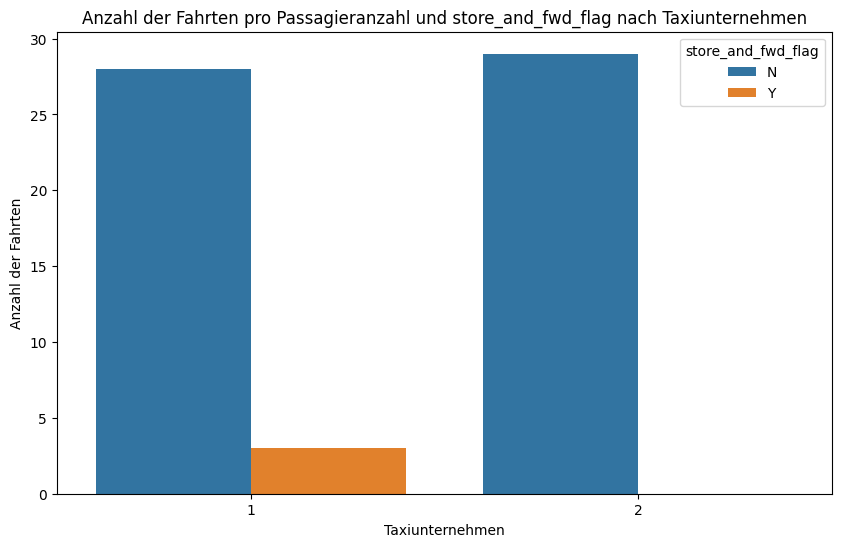

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

passenger_zero_trips = df[df['passenger_count'] == 0]

plt.figure(figsize=(10, 6))

# Verwendung von 'hue' für die differenzierte Darstellung von 'store_and_fwd_flag'
sns.countplot(data=passenger_zero_trips, x='vendor_id', hue='store_and_fwd_flag')
plt.xlabel('Taxiunternehmen')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten pro Passagieranzahl und store_and_fwd_flag nach Taxiunternehmen')
plt.legend(title='store_and_fwd_flag', loc='upper right')
plt.xticks(rotation=0)
plt.show()


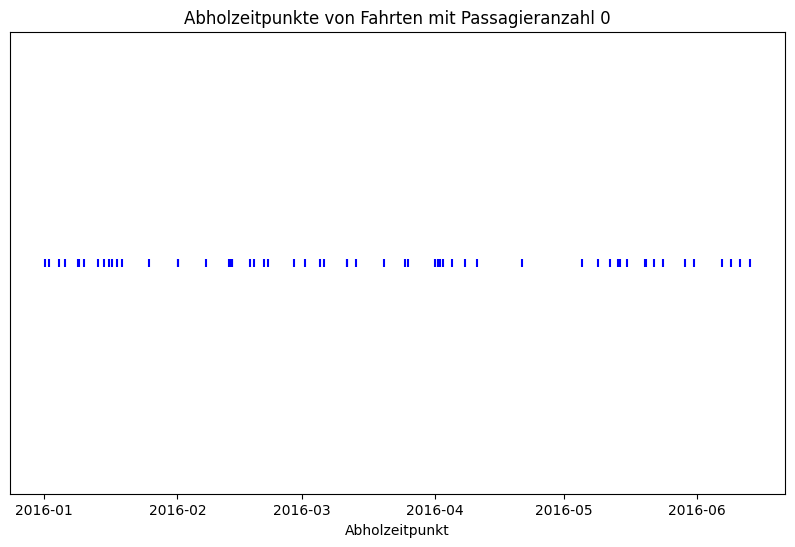

In [17]:
import matplotlib.pyplot as plt

passenger_zero_trips = df[df['passenger_count'] == 0]

passenger_zero_trips['pickup_datetime'] = pd.to_datetime(passenger_zero_trips['pickup_datetime'])

passenger_zero_trips = passenger_zero_trips.sort_values(by='pickup_datetime')

plt.figure(figsize=(10, 6))
plt.scatter(passenger_zero_trips['pickup_datetime'], [1] * len(passenger_zero_trips), marker='|', color='blue')
plt.yticks([])  # Ausblenden der Y-Achse (Fahrten mit Passagieranzahl 0)
plt.xlabel('Abholzeitpunkt')
plt.title('Abholzeitpunkte von Fahrten mit Passagieranzahl 0')
plt.show()


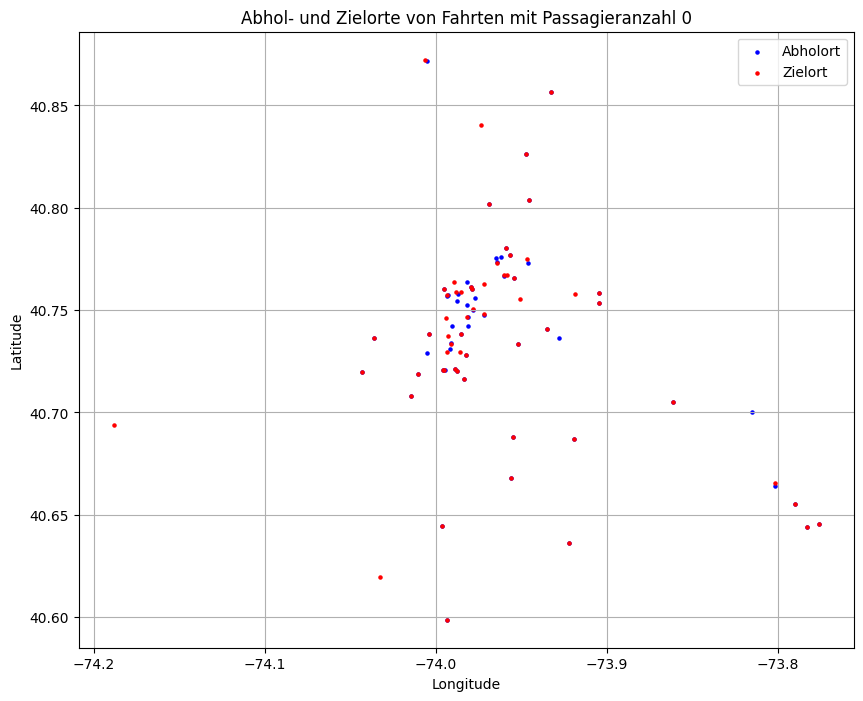

In [18]:
import matplotlib.pyplot as plt

passenger_zero_trips = df[df['passenger_count'] == 0]

plt.figure(figsize=(10, 8))

plt.scatter(passenger_zero_trips['pickup_longitude'], passenger_zero_trips['pickup_latitude'], color='blue', label='Abholort', s=5)

plt.scatter(passenger_zero_trips['dropoff_longitude'], passenger_zero_trips['dropoff_latitude'], color='red', label='Zielort', s=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Abhol- und Zielorte von Fahrten mit Passagieranzahl 0')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Anzahl der Fahrten mit sehr kurzer Dauer nach Taxiunternehmen

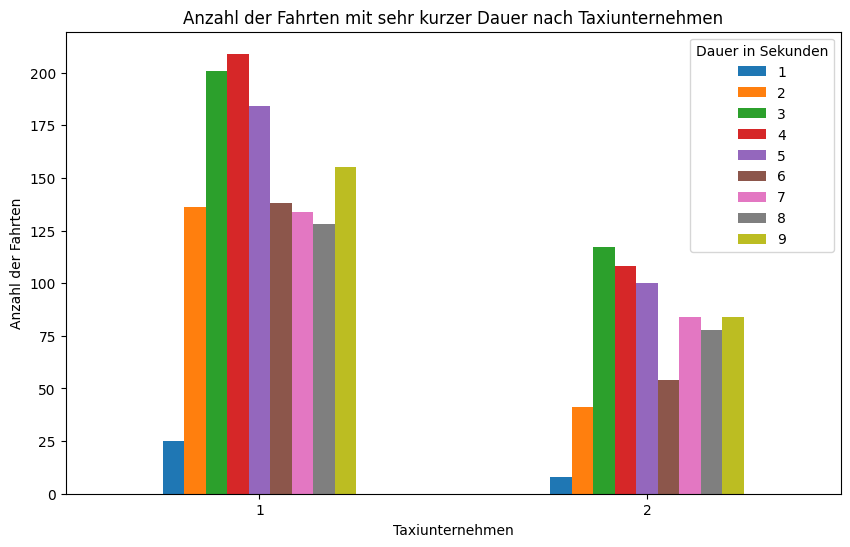

In [103]:
# Filtern nach Fahrten mit einer Dauer von weniger als einer Minute (10 Sekunden)

#short_duration_trips = df[df['trip_duration'] == 0]

short_duration_trips = df[df['trip_duration'] < 10]

passenger_counts = short_duration_trips.groupby(['vendor_id', 'trip_duration']).size().unstack()
passenger_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel('Taxiunternehmen')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit sehr kurzer Dauer nach Taxiunternehmen')
plt.legend(title='Dauer in Sekunden', loc='upper right')
plt.xticks(rotation=0)
plt.show()


#### Anzahl der Fahrten mit sehr kurzer Dauer nach Taxiunternehmen und store_and_fwd_flag


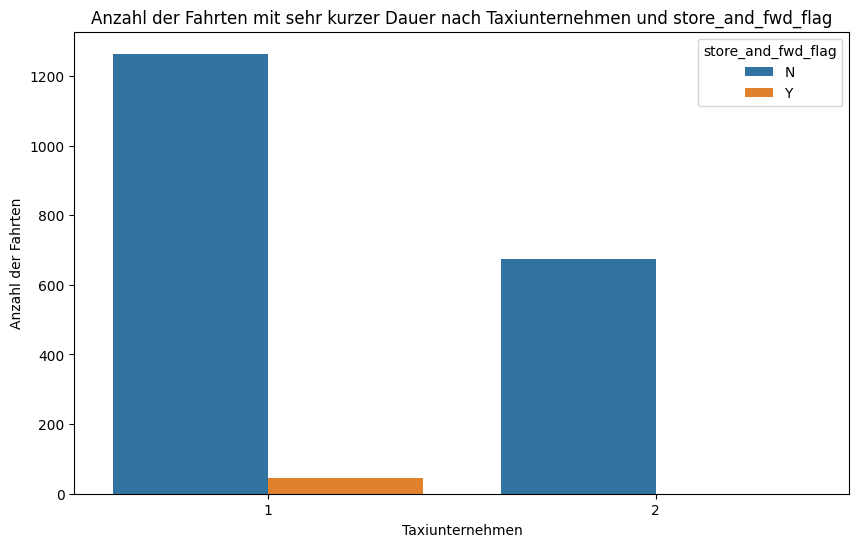

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

short_duration_trips = df[df['trip_duration'] < 10]

plt.figure(figsize=(10, 6))

# Verwendung von 'hue' für die differenzierte Darstellung von 'store_and_fwd_flag'
sns.countplot(data=short_duration_trips, x='vendor_id', hue='store_and_fwd_flag')
plt.xlabel('Taxiunternehmen')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit sehr kurzer Dauer nach Taxiunternehmen und store_and_fwd_flag')
plt.legend(title='store_and_fwd_flag', loc='upper right')
plt.xticks(rotation=0)
plt.show()


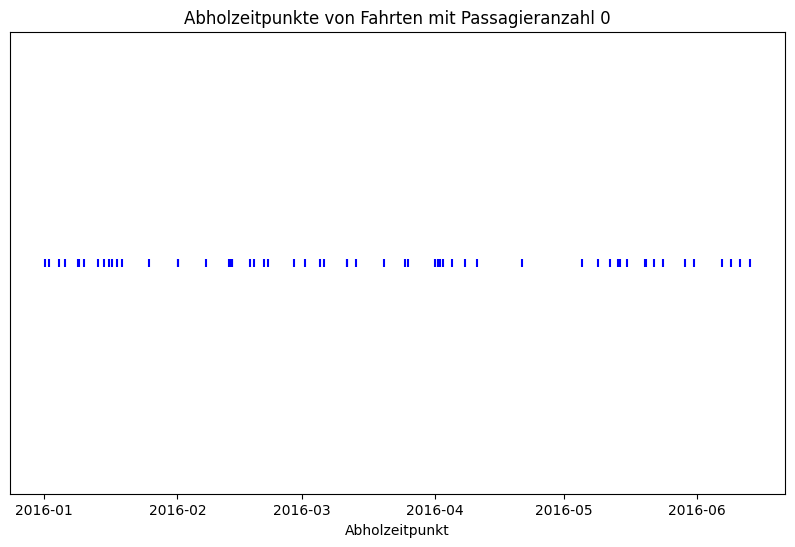

In [20]:
import matplotlib.pyplot as plt

short_duration_trips = df[df['trip_duration'] < 10]

passenger_zero_trips['pickup_datetime'] = pd.to_datetime(passenger_zero_trips['pickup_datetime'])

passenger_zero_trips = passenger_zero_trips.sort_values(by='pickup_datetime')

plt.figure(figsize=(10, 6))
plt.scatter(passenger_zero_trips['pickup_datetime'], [1] * len(passenger_zero_trips), marker='|', color='blue')
plt.yticks([])  # Ausblenden der Y-Achse (Fahrten mit Passagieranzahl 0)
plt.xlabel('Abholzeitpunkt')
plt.title('Abholzeitpunkte von Fahrten mit Passagieranzahl 0')
plt.show()


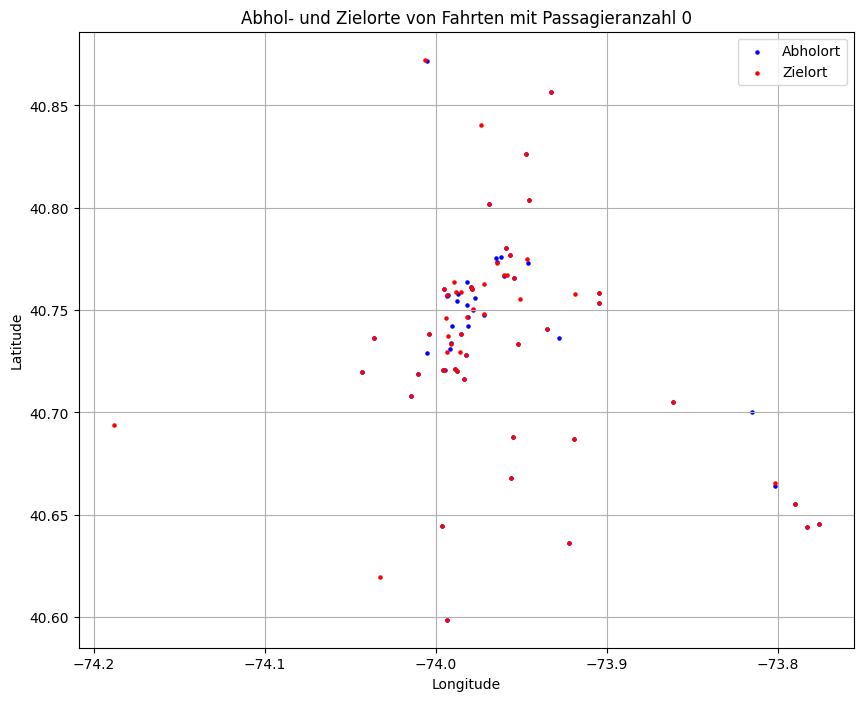

In [21]:
import matplotlib.pyplot as plt

short_duration_trips = df[df['trip_duration'] < 10]

plt.figure(figsize=(10, 8))

plt.scatter(passenger_zero_trips['pickup_longitude'], passenger_zero_trips['pickup_latitude'], color='blue', label='Abholort', s=5)

plt.scatter(passenger_zero_trips['dropoff_longitude'], passenger_zero_trips['dropoff_latitude'], color='red', label='Zielort', s=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Abhol- und Zielorte von Fahrten mit Passagieranzahl 0')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Fahrten mit kurzer Dauer nach Anzahl der Passagiere und Taxiunternehmen

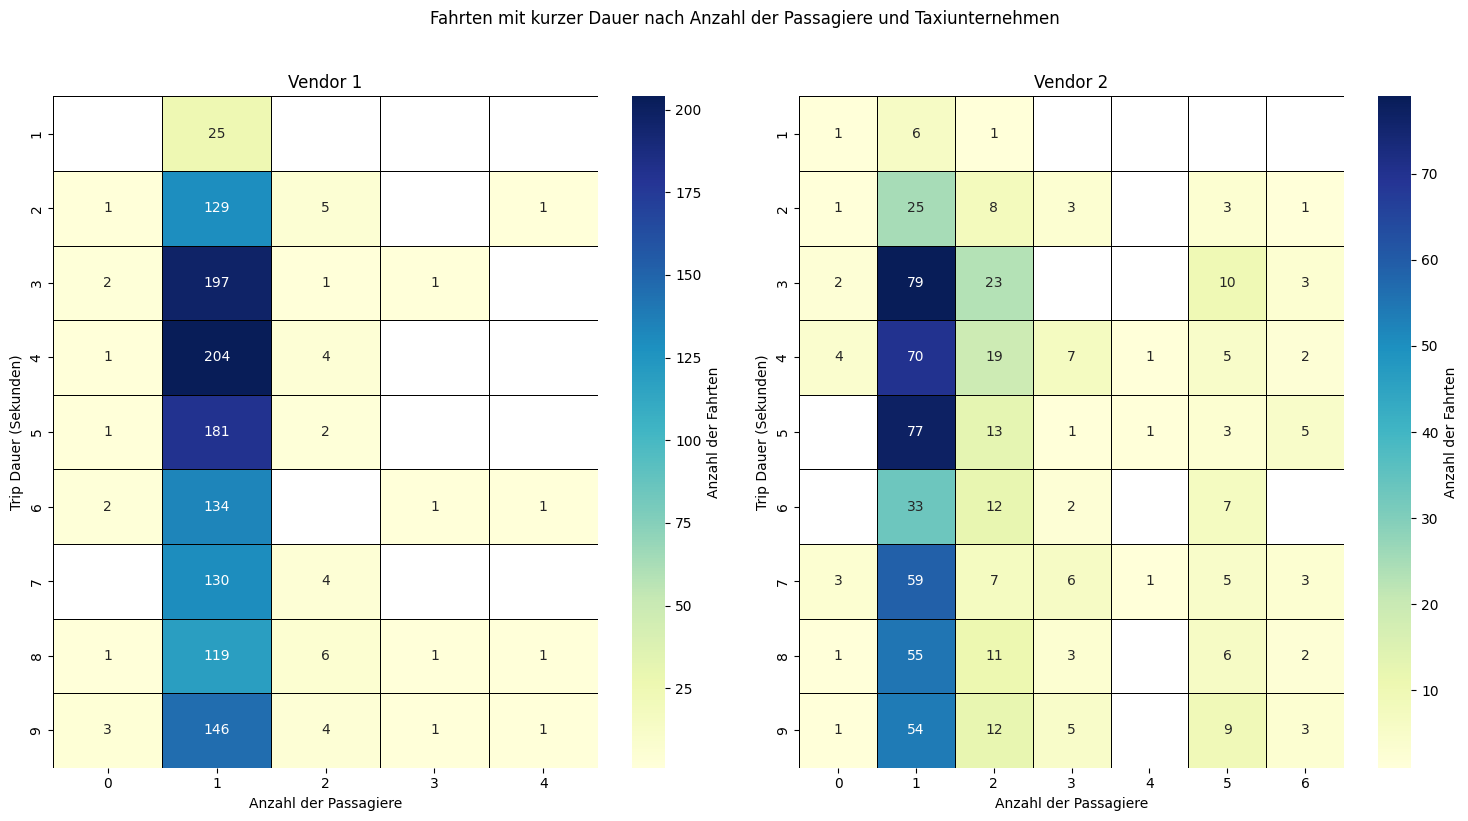

In [65]:
import seaborn as sns

short_duration_trips = df[df['trip_duration'] < 10]

grouped_trips = short_duration_trips.groupby(['vendor_id', 'trip_duration', 'passenger_count']).size().reset_index(name='count')

unique_vendors = grouped_trips['vendor_id'].unique()

plt.figure(figsize=(15, 8))

for i, vendor_id in enumerate(unique_vendors, start=1):
    plt.subplot(1, len(unique_vendors), i)
    filtered_data = grouped_trips[grouped_trips['vendor_id'] == vendor_id]
    pivot_table = filtered_data.pivot(index='trip_duration', columns='passenger_count', values='count')
    
    sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5, linecolor='black',
                cbar_kws={'label': 'Anzahl der Fahrten'})
    
    plt.title(f'Vendor {vendor_id}')
    plt.xlabel('Anzahl der Passagiere')
    plt.ylabel('Trip Dauer (Sekunden)')

plt.suptitle('Fahrten mit kurzer Dauer nach Anzahl der Passagiere und Taxiunternehmen', y=1.02)
plt.tight_layout()
plt.show()


#### Fahrten mit kurzer Dauer nach Anzahl der Passagiere, Taxiunternehmen und store_and_fwd_flag

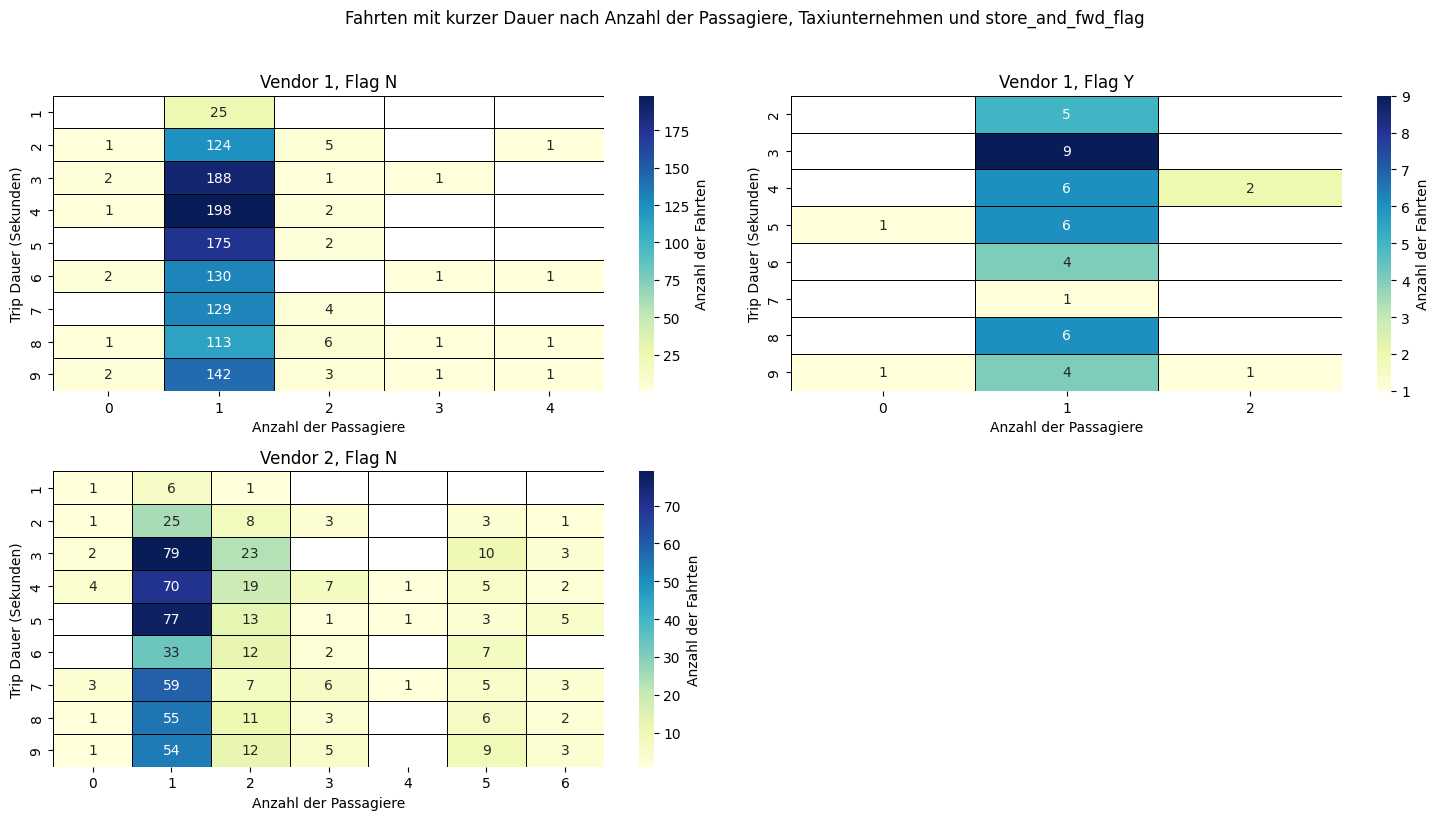

In [67]:
import seaborn as sns

short_duration_trips = df[df['trip_duration'] < 10]

grouped_trips = short_duration_trips.groupby(['vendor_id', 'trip_duration', 'passenger_count', 'store_and_fwd_flag']).size().reset_index(name='count')

unique_vendors = grouped_trips['vendor_id'].unique()
unique_flags = grouped_trips['store_and_fwd_flag'].unique()

plt.figure(figsize=(15, 8))

for i, vendor_id in enumerate(unique_vendors, start=1):
    for j, flag in enumerate(unique_flags, start=1):
        filtered_data = grouped_trips[(grouped_trips['vendor_id'] == vendor_id) & (grouped_trips['store_and_fwd_flag'] == flag)]
        
        # Überprüfung, ob die Daten für die Kombination vorhanden sind
        if not filtered_data.empty:
            plt.subplot(len(unique_vendors), len(unique_flags), len(unique_flags)*(i-1) + j)
            pivot_table = filtered_data.pivot(index='trip_duration', columns='passenger_count', values='count')
            
            sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5, linecolor='black',
                        cbar_kws={'label': 'Anzahl der Fahrten'})
            
            plt.title(f'Vendor {vendor_id}, Flag {flag}')
            plt.xlabel('Anzahl der Passagiere')
            plt.ylabel('Trip Dauer (Sekunden)')

plt.suptitle('Fahrten mit kurzer Dauer nach Anzahl der Passagiere, Taxiunternehmen und store_and_fwd_flag', y=1.02)
plt.tight_layout()
plt.show()


#### 3. Anzahl der Fahrten pro Wochentag

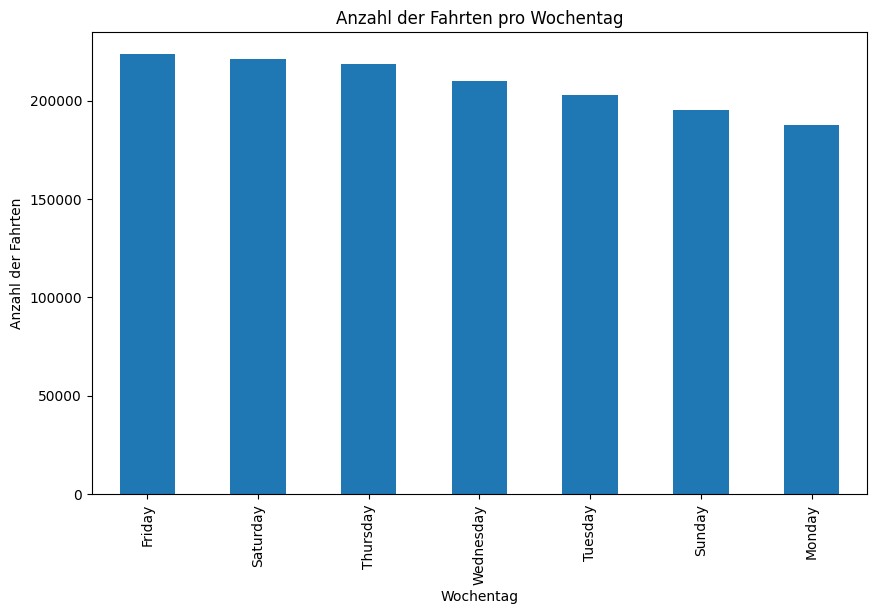

In [23]:
import matplotlib.pyplot as plt

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['weekday'] = df['pickup_datetime'].dt.day_name()

weekday_counts = df['weekday'].value_counts()
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten pro Wochentag')
plt.show()


#### Anzahl der Fahrten pro Wochentag nach store_and_fwd_flag und vendor_id'

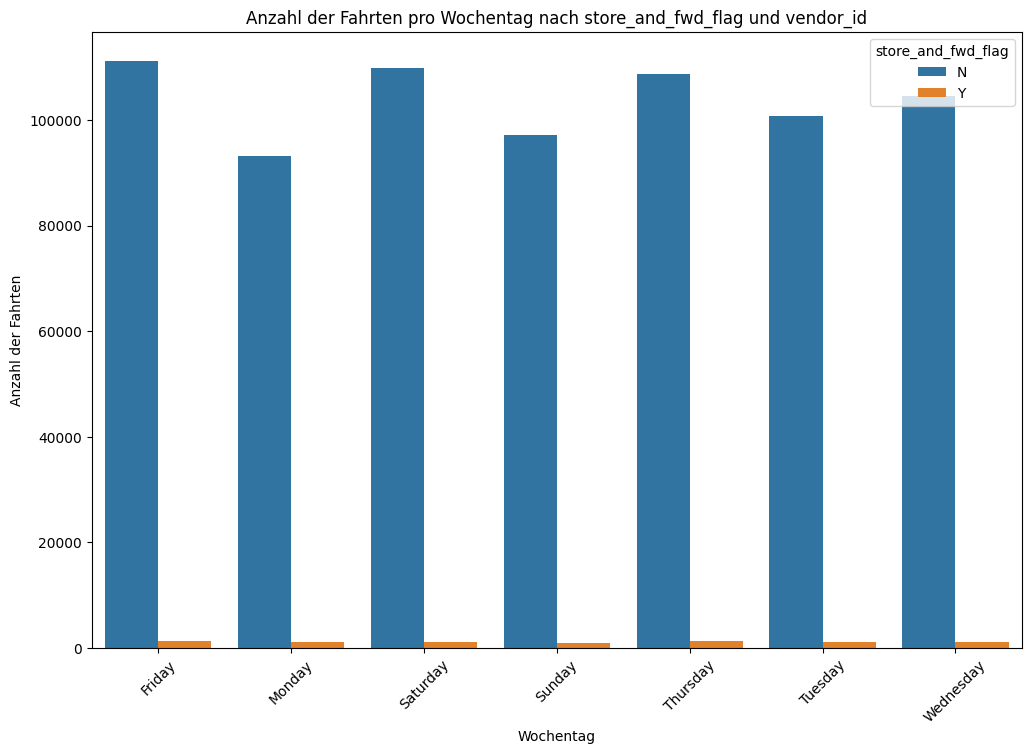

In [68]:
import seaborn as sns

# Konvertierung der 'pickup_datetime' in einen datetime-Datentyp und Extrahieren des Wochentags
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['weekday'] = df['pickup_datetime'].dt.day_name()

# Erstellung eines DataFrames, der die Anzahl der Fahrten pro Wochentag, 'store_and_fwd_flag' und 'vendor_id' enthält
weekday_counts = df.groupby(['weekday', 'store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellung des Balkendiagramms mit 'seaborn'
plt.figure(figsize=(12, 8))
sns.barplot(data=weekday_counts, x='weekday', y='count', hue='store_and_fwd_flag', ci=None)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten pro Wochentag nach store_and_fwd_flag und vendor_id')
plt.legend(title='store_and_fwd_flag', loc='upper right')
plt.xticks(rotation=45)
plt.show()


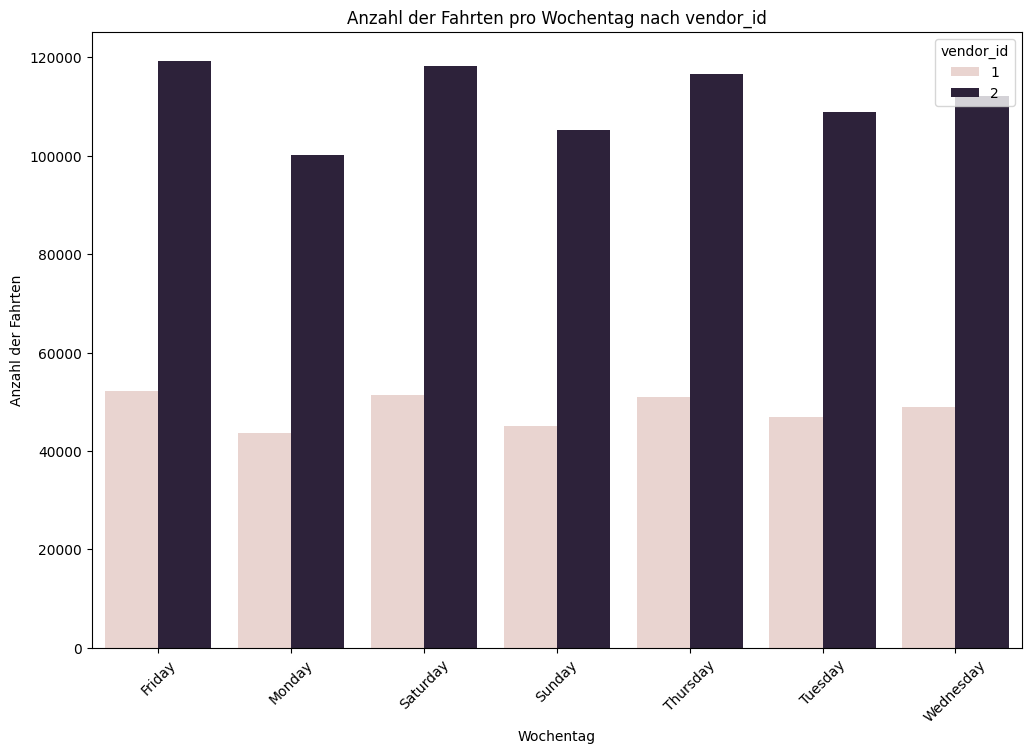

In [79]:
import seaborn as sns

# Konvertierung der 'pickup_datetime' in einen datetime-Datentyp und Extrahieren des Wochentags
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['weekday'] = df['pickup_datetime'].dt.day_name()

# Erstellung eines DataFrames, der die Anzahl der Fahrten pro Wochentag, 'store_and_fwd_flag' und 'vendor_id' enthält
weekday_counts = df.groupby(['weekday', 'store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellung des Balkendiagramms mit 'seaborn' unter Berücksichtigung von store_and_fwd_flag und vendor_id
plt.figure(figsize=(12, 8))
sns.barplot(data=weekday_counts, x='weekday', y='count', hue='vendor_id', ci=None)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten pro Wochentag nach vendor_id')
plt.legend(title='vendor_id', loc='upper right')
plt.xticks(rotation=45)
plt.show()


#### 4. Anzahl der Fahrten mit Passagieranzahl 0 nach Wochentag

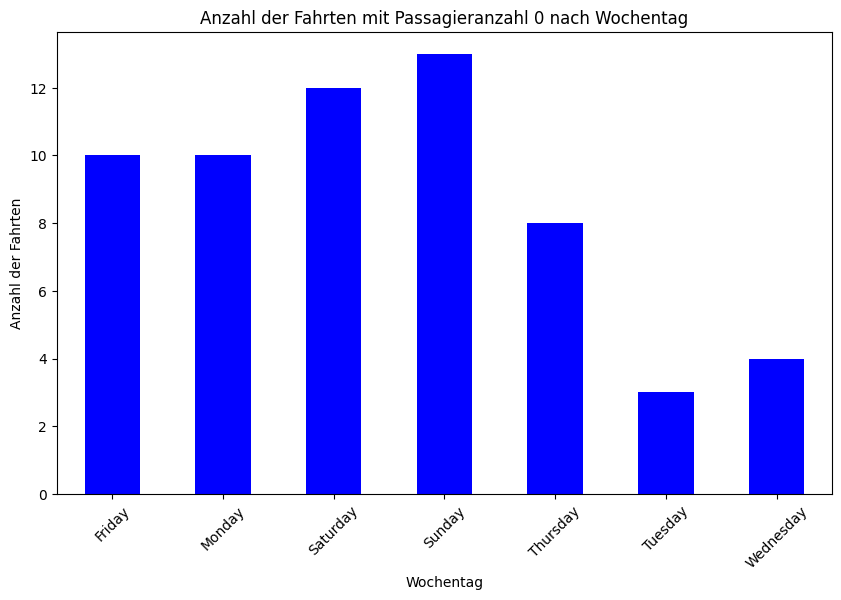

In [24]:
import matplotlib.pyplot as plt

passenger_zero_trips = df[df['passenger_count'] == 0]
passenger_zero_counts_by_weekday = passenger_zero_trips['weekday'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
passenger_zero_counts_by_weekday.plot(kind='bar', color='blue')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit Passagieranzahl 0 nach Wochentag')
plt.xticks(rotation=45)
plt.show()


#### Anzahl der Fahrten mit Passagieranzahl 0 pro Wochentag nach store_and_fwd_flag und vendor_id'

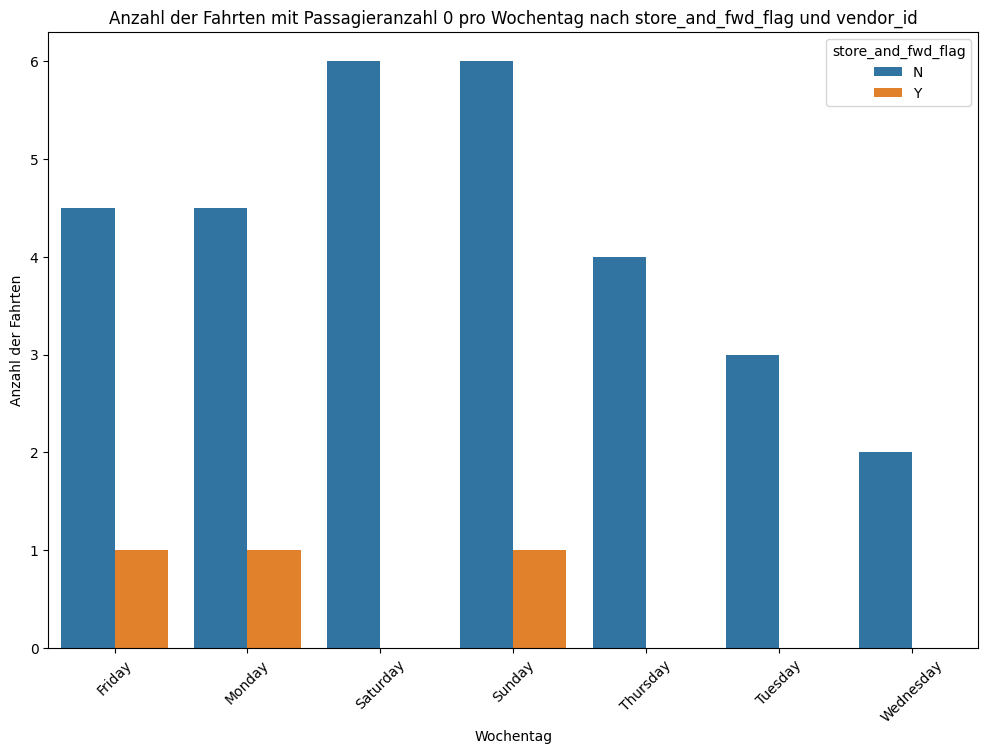

In [69]:
import seaborn as sns

# Filtern nach Fahrten mit Passagieranzahl 0
passenger_zero_trips = df[df['passenger_count'] == 0]

# Gruppierung nach Wochentag, store_and_fwd_flag und vendor_id
passenger_zero_counts_by_weekday = passenger_zero_trips.groupby(['weekday', 'store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellung des Balkendiagramms mit 'seaborn'
plt.figure(figsize=(12, 8))
sns.barplot(data=passenger_zero_counts_by_weekday, x='weekday', y='count', hue='store_and_fwd_flag', ci=None)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit Passagieranzahl 0 pro Wochentag nach store_and_fwd_flag und vendor_id')
plt.legend(title='store_and_fwd_flag', loc='upper right')
plt.xticks(rotation=45)
plt.show()


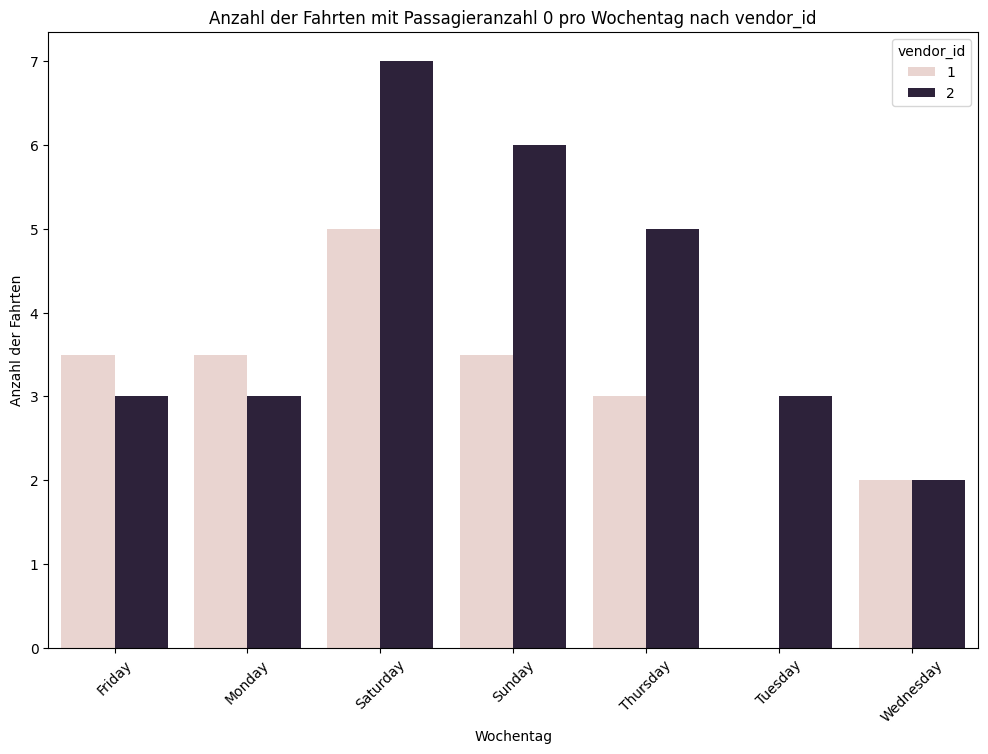

In [78]:
import seaborn as sns

# Filtern nach Fahrten mit Passagieranzahl 0
passenger_zero_trips = df[df['passenger_count'] == 0]

# Gruppierung nach Wochentag, store_and_fwd_flag und vendor_id
passenger_zero_counts_by_weekday = passenger_zero_trips.groupby(['weekday', 'store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellung des Balkendiagramms mit 'seaborn' unter Berücksichtigung von store_and_fwd_flag und vendor_id
plt.figure(figsize=(12, 8))
sns.barplot(data=passenger_zero_counts_by_weekday, x='weekday', y='count', hue='vendor_id', ci=None)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit Passagieranzahl 0 pro Wochentag nach vendor_id')
plt.legend(title='vendor_id', loc='upper right')
plt.xticks(rotation=45)
plt.show()


#### 5. Anzahl der Fahrten mit kurzer Dauer nach Wochentag

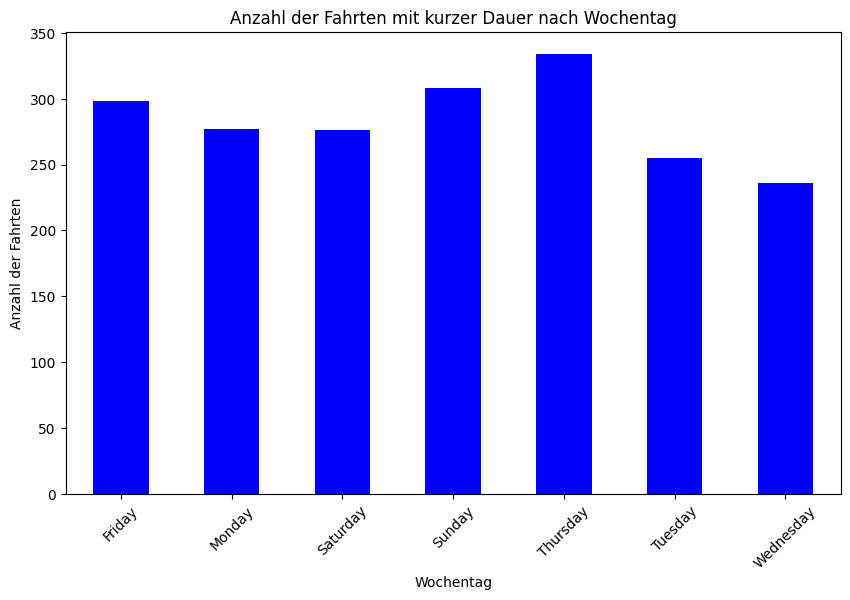

In [25]:
passenger_zero_trips = df[df['trip_duration'] < 10]

passenger_zero_counts_by_weekday = passenger_zero_trips['weekday'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
passenger_zero_counts_by_weekday.plot(kind='bar', color='blue')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit kurzer Dauer nach Wochentag')
plt.xticks(rotation=45)
plt.show()

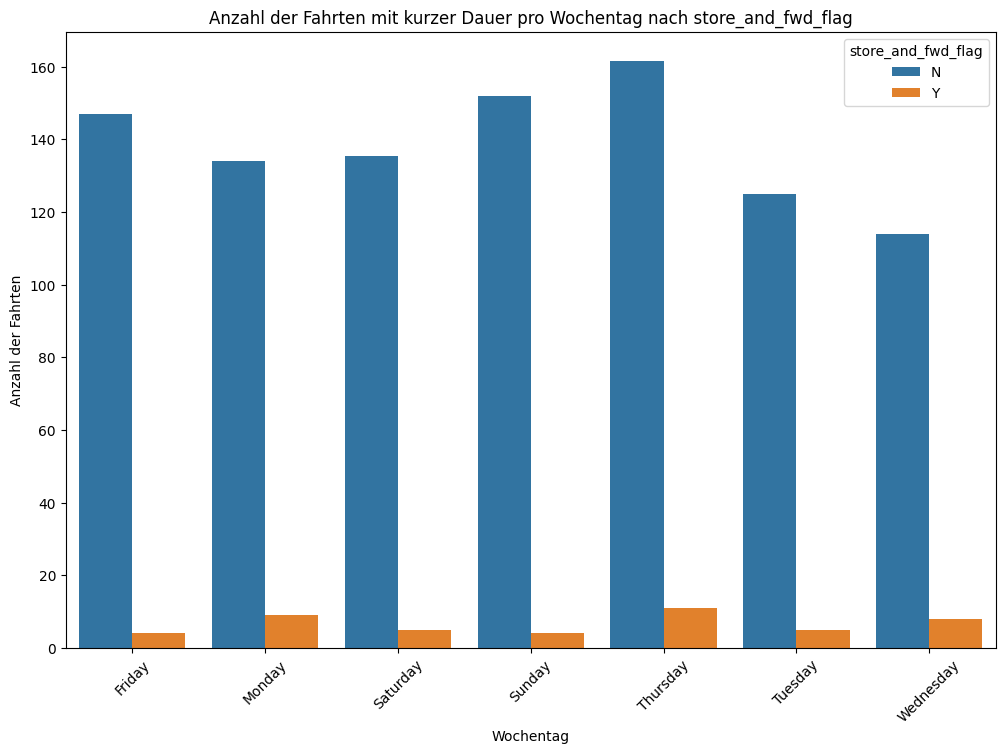

In [76]:
import seaborn as sns

# Filtern nach Fahrten mit kurzer Dauer (weniger als 10 Sekunden)
passenger_zero_trips = df[df['trip_duration'] < 10]

# Gruppierung nach Wochentag, store_and_fwd_flag und vendor_id
passenger_zero_counts_by_weekday = passenger_zero_trips.groupby(['weekday', 'store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellung des Balkendiagramms mit 'seaborn'
plt.figure(figsize=(12, 8))
sns.barplot(data=passenger_zero_counts_by_weekday, x='weekday', y='count', hue='store_and_fwd_flag', ci=None)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit kurzer Dauer pro Wochentag nach store_and_fwd_flag')
plt.legend(title='store_and_fwd_flag', loc='upper right')
plt.xticks(rotation=45)
plt.show()


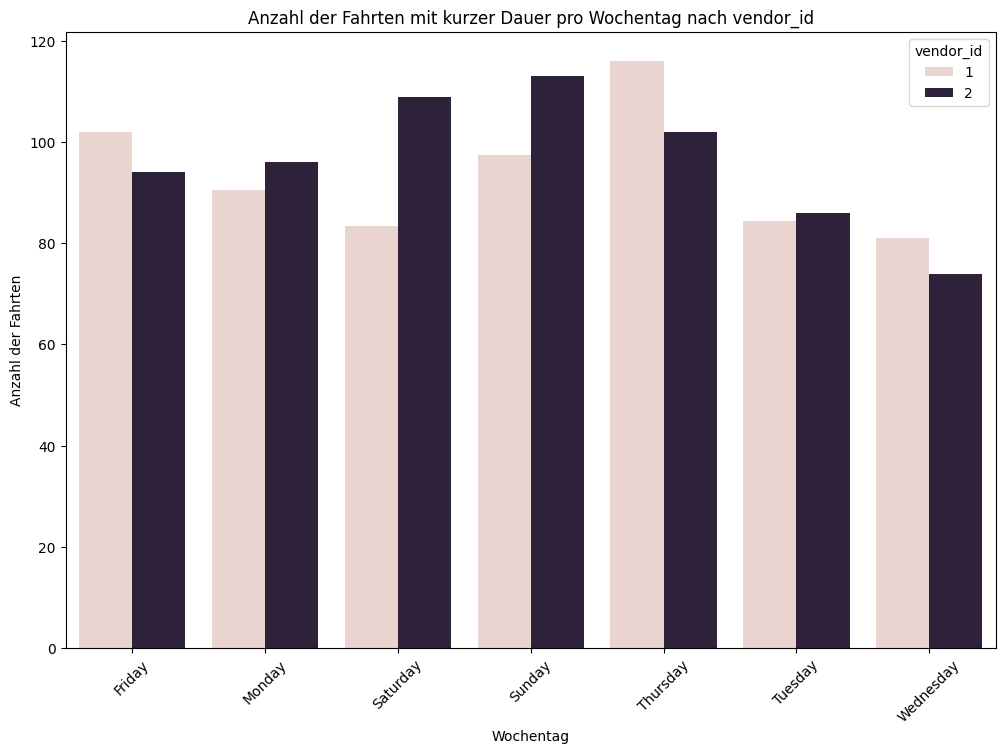

In [75]:
import seaborn as sns

# Filtern nach Fahrten mit kurzer Dauer (weniger als 10 Sekunden)
passenger_zero_trips = df[df['trip_duration'] < 10]

# Gruppierung nach Wochentag, store_and_fwd_flag und vendor_id
passenger_zero_counts_by_weekday = passenger_zero_trips.groupby(['weekday', 'store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellung des Balkendiagramms mit 'seaborn' unter Berücksichtigung von store_and_fwd_flag und vendor_id
plt.figure(figsize=(12, 8))
sns.barplot(data=passenger_zero_counts_by_weekday, x='weekday', y='count', hue='vendor_id', ci=None)
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit kurzer Dauer pro Wochentag nach vendor_id')
plt.legend(title='vendor_id', loc='upper right')
plt.xticks(rotation=45)
plt.show()


#### 6. Distanz für alle Fahrten

In [28]:
from geopy.distance import geodesic as GD

def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return round(GD(pickup_coords, dropoff_coords).km, 2)

df['distance_km'] = df.apply(lambda row: calculate_distance(row), axis=1)

print(df.head())


          id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration    weekday  distance_km  
0         40.765602                  N            455     Mo

In [35]:
df.distance_km.describe()

count    1.458644e+06
mean     3.442193e+00
std      4.300262e+00
min      0.000000e+00
25%      1.230000e+00
50%      2.090000e+00
75%      3.870000e+00
max      1.240510e+03
Name: distance_km, dtype: float64

### distance_km ist Null 


In [37]:
# Filtern des DataFrames, um Zeilen zu erhalten, in denen distance_km Null ist
null_distance_rows = df[df['distance_km'] == 0]

# Anzeigen der Zeilen, in denen distance_km Null ist
display(null_distance_rows)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,distance_km,speed_kmph
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,Monday,0.0,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,Tuesday,0.0,0.0
323,id2954399,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,N,40,Monday,0.0,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,Monday,0.0,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,Monday,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457121,id2651184,1,2016-04-03 07:24:06,2016-04-03 07:24:13,1,-73.913620,40.765675,-73.913620,40.765667,N,7,Sunday,0.0,0.0
1457136,id1907784,1,2016-03-25 20:06:52,2016-03-25 20:09:48,1,-73.966705,40.769783,-73.966705,40.769783,N,176,Friday,0.0,0.0
1457462,id1813892,1,2016-01-19 18:09:44,2016-01-19 18:10:09,3,-73.951660,40.809105,-73.951668,40.809101,N,25,Tuesday,0.0,0.0
1457746,id1044471,2,2016-01-29 21:58:11,2016-01-29 21:58:23,1,-73.975708,40.733089,-73.975685,40.733101,N,12,Friday,0.0,0.0


Anzahl der Zeilen mit distance_km gleich Null: 7935


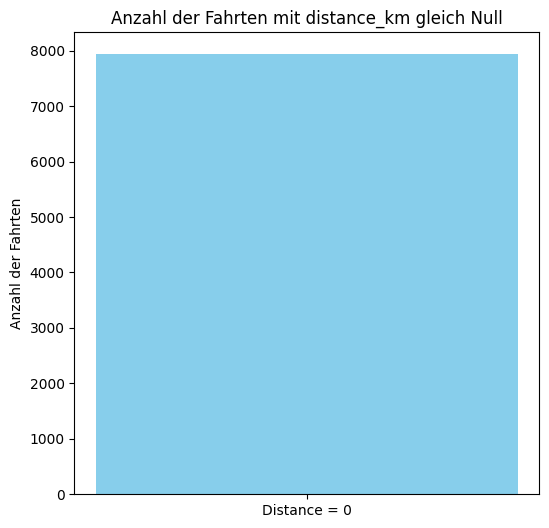

In [41]:
import matplotlib.pyplot as plt

# Filtern des DataFrames, um Zeilen zu erhalten, in denen distance_km Null ist
null_distance_rows = df[df['distance_km'] == 0]

# Anzeigen der Anzahl der Zeilen mit distance_km gleich Null
num_null_distance = len(null_distance_rows)
print(f"Anzahl der Zeilen mit distance_km gleich Null: {num_null_distance}")

# Erstellen eines Balkendiagramms für die Anzahl der Fälle mit distance_km Null
plt.figure(figsize=(6, 6))
plt.bar(['Distance = 0'], [num_null_distance], color='skyblue')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit distance_km gleich Null')
plt.show()


#### 7. Geschwindigkeit in km/h für jede Fahrt 

In [32]:
# Berechnung der Geschwindigkeit in km/h für jede Fahrt und Hinzufügen einer neuen Spalte 'speed_kmph'
df['speed_kmph'] = round(df['distance_km'] / (df['trip_duration'] / 3600), 2 ) # Umrechnung von Sekunden in Stunden

# Anzeigen der ersten Zeilen des aktualisierten DataFrames
display(df.head())


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,distance_km,speed_kmph
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,1.50,11.87
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1.81,9.83
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,6.38,10.81
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,1.48,12.42
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1.19,9.85


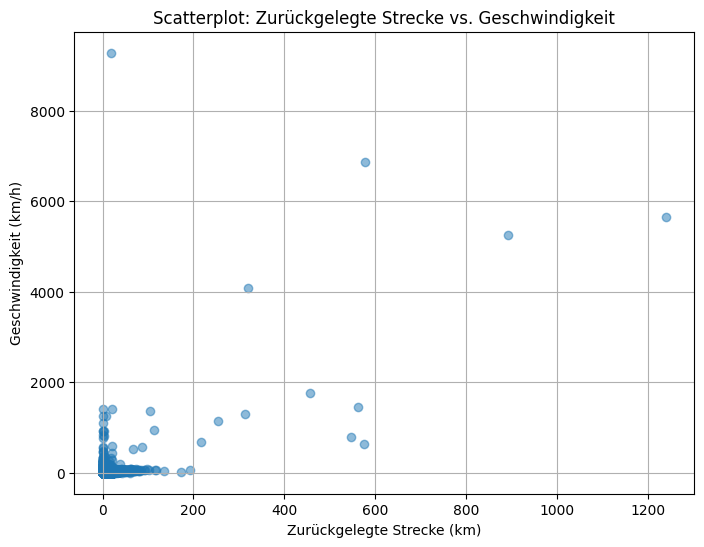

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['distance_km'], df['speed_kmph'], alpha=0.5)
plt.xlabel('Zurückgelegte Strecke (km)')
plt.ylabel('Geschwindigkeit (km/h)')
plt.title('Scatterplot: Zurückgelegte Strecke vs. Geschwindigkeit')
plt.grid(True)
plt.show()


In [ ]:
# wo speed ist wie Hoch!!

In [38]:
df.speed_kmph.describe()

count    1.458644e+06
mean     1.442525e+01
std      1.497986e+01
min      0.000000e+00
25%      9.120000e+00
50%      1.279000e+01
75%      1.785000e+01
max      9.277710e+03
Name: speed_kmph, dtype: float64

#### speed_kmph ist  Null 

In [39]:
# Filtern des DataFrames, um Zeilen zu erhalten, in denen speed_kmph Null ist
null_speed_kmph_rows = df[df['speed_kmph'] == 0]

# Anzeigen der Zeilen, in denen speed_kmph Null ist
display(null_speed_kmph_rows)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,distance_km,speed_kmph
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,Monday,0.0,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,Tuesday,0.0,0.0
323,id2954399,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,N,40,Monday,0.0,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,Monday,0.0,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,Monday,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457121,id2651184,1,2016-04-03 07:24:06,2016-04-03 07:24:13,1,-73.913620,40.765675,-73.913620,40.765667,N,7,Sunday,0.0,0.0
1457136,id1907784,1,2016-03-25 20:06:52,2016-03-25 20:09:48,1,-73.966705,40.769783,-73.966705,40.769783,N,176,Friday,0.0,0.0
1457462,id1813892,1,2016-01-19 18:09:44,2016-01-19 18:10:09,3,-73.951660,40.809105,-73.951668,40.809101,N,25,Tuesday,0.0,0.0
1457746,id1044471,2,2016-01-29 21:58:11,2016-01-29 21:58:23,1,-73.975708,40.733089,-73.975685,40.733101,N,12,Friday,0.0,0.0


Anzahl der Zeilen mit speed_kmph gleich Null: 7935


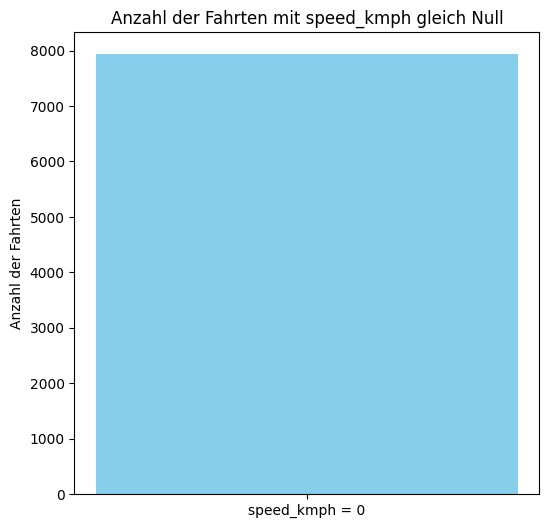

In [46]:
import matplotlib.pyplot as plt

# Filtern des DataFrames, um Zeilen zu erhalten, in denen distance_km Null ist
null_speed_kmph_rows = df[df['speed_kmph'] == 0]

# Anzeigen der Anzahl der Zeilen mit distance_km gleich Null
num_null_speed_kmph= len(null_distance_rows)
print(f"Anzahl der Zeilen mit speed_kmph gleich Null: {num_null_speed_kmph}")

# Erstellen eines Balkendiagramms für die Anzahl der Fälle mit distance_km Null
plt.figure(figsize=(6, 6))
plt.bar(['speed_kmph = 0'], [num_null_speed_kmph], color='skyblue')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit speed_kmph gleich Null')
plt.show()


#### beide Diagramme mit der Werte Null vergleichen

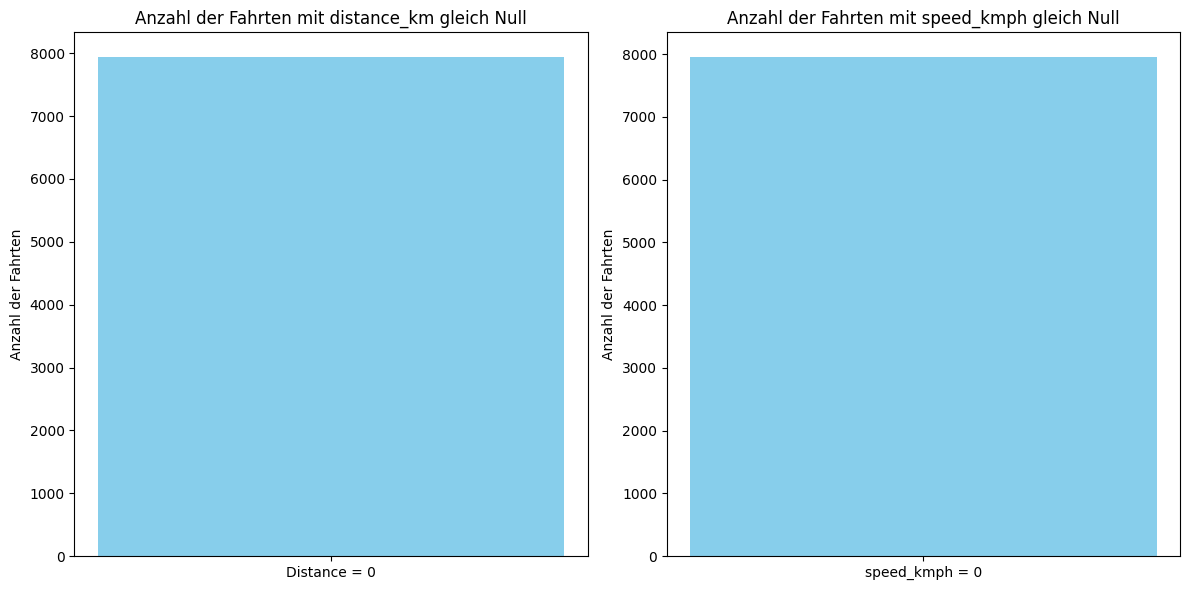

Anzahl der Zeilen mit speed_kmph gleich Null: 7949                                            Anzahl der Zeilen mit distance_km gleich Null: 7935


In [56]:
import matplotlib.pyplot as plt

# Filtern des DataFrames, um Zeilen zu erhalten, in denen distance_km Null ist
null_distance_rows = df[df['distance_km'] == 0]
num_null_distance = len(null_distance_rows)

# Filtern des DataFrames, um Zeilen zu erhalten, in denen speed_kmph Null ist
null_speed_kmph_rows = df[df['speed_kmph'] == 0]
num_null_speed_kmph = len(null_speed_kmph_rows)

# Erstellen der Subplots für beide Diagramme
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Balkendiagramm für die Anzahl der Fälle mit distance_km Null
axs[0].bar(['Distance = 0'], [num_null_distance], color='skyblue')
axs[0].set_ylabel('Anzahl der Fahrten')
axs[0].set_title('Anzahl der Fahrten mit distance_km gleich Null')

# Balkendiagramm für die Anzahl der Fälle mit speed_kmph Null
axs[1].bar(['speed_kmph = 0'], [num_null_speed_kmph], color='skyblue')
axs[1].set_ylabel('Anzahl der Fahrten')
axs[1].set_title('Anzahl der Fahrten mit speed_kmph gleich Null')

plt.tight_layout()
plt.show()
print(f"Anzahl der Zeilen mit speed_kmph gleich Null: {num_null_speed_kmph}                                            Anzahl der Zeilen mit distance_km gleich Null: {num_null_distance}")



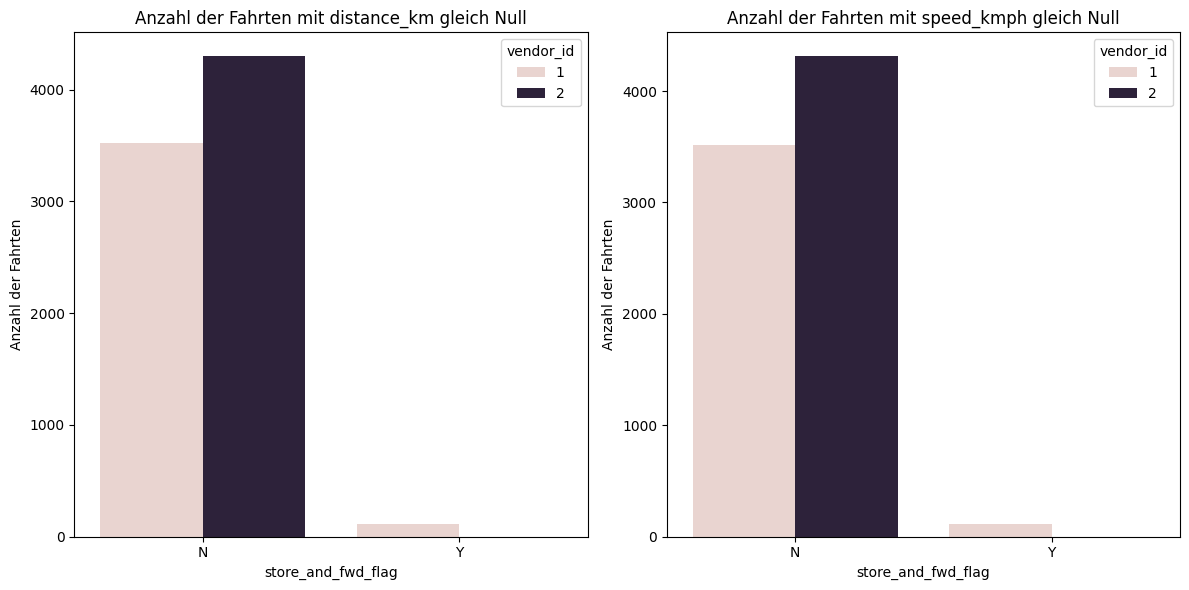

In [73]:
import seaborn as sns

# Filtern des DataFrames, um Zeilen zu erhalten, in denen distance_km Null ist
null_distance_rows = df[df['distance_km'] == 0]
num_null_distance = len(null_distance_rows)

# Filtern des DataFrames, um Zeilen zu erhalten, in denen speed_kmph Null ist
null_speed_kmph_rows = df[df['speed_kmph'] == 0]
num_null_speed_kmph = len(null_speed_kmph_rows)

# Gruppierung nach store_and_fwd_flag und vendor_id und Zählen der Werte
null_distance_counts = null_distance_rows.groupby(['store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')
null_speed_kmph_counts = null_speed_kmph_rows.groupby(['store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellen der Subplots für beide Diagramme
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Balkendiagramm für die Anzahl der Fälle mit distance_km Null nach store_and_fwd_flag und vendor_id
sns.barplot(data=null_distance_counts, x='store_and_fwd_flag', y='count', hue='vendor_id', ax=axs[0])
axs[0].set_ylabel('Anzahl der Fahrten')
axs[0].set_title('Anzahl der Fahrten mit distance_km gleich Null')

# Balkendiagramm für die Anzahl der Fälle mit speed_kmph Null nach store_and_fwd_flag und vendor_id
sns.barplot(data=null_speed_kmph_counts, x='store_and_fwd_flag', y='count', hue='vendor_id', ax=axs[1])
axs[1].set_ylabel('Anzahl der Fahrten')
axs[1].set_title('Anzahl der Fahrten mit speed_kmph gleich Null')

plt.tight_layout()
plt.show()


#### distance_km und speed_kmph gleich 0 


Anzahl der Fahrten mit Distance und Speed glich Null: 7935


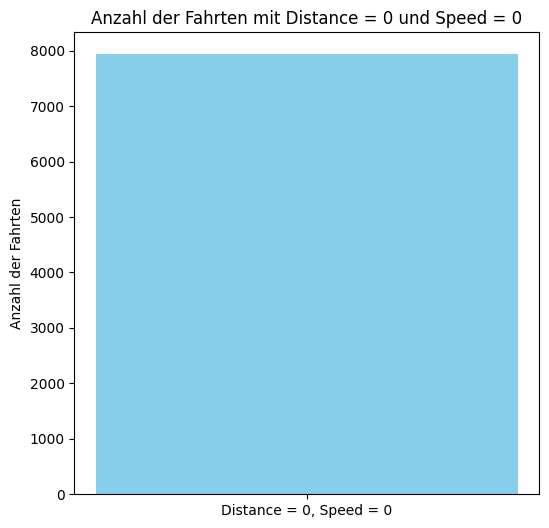

In [84]:
import matplotlib.pyplot as plt

# Filtern nach Fahrten, bei denen distance_km und speed_kmph gleich 0 sind
both_zero_distance_speed = df[(df['distance_km'] == 0) & (df['speed_kmph'] == 0)]
num_both_zero = len(both_zero_distance_speed)
print(f"Anzahl der Fahrten mit Distance und Speed glich Null: {num_both_zero}")
# Erstellen eines Balkendiagramms für die Anzahl der Fahrten mit beiden Werten gleich 0
plt.figure(figsize=(6, 6))
plt.bar(['Distance = 0, Speed = 0'], [num_both_zero], color='skyblue')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit Distance = 0 und Speed = 0')
plt.show()


Anzahl der Fahrten mit Distance = 0 und Speed = 0 nach store_and_fwd_flag und vendor_id

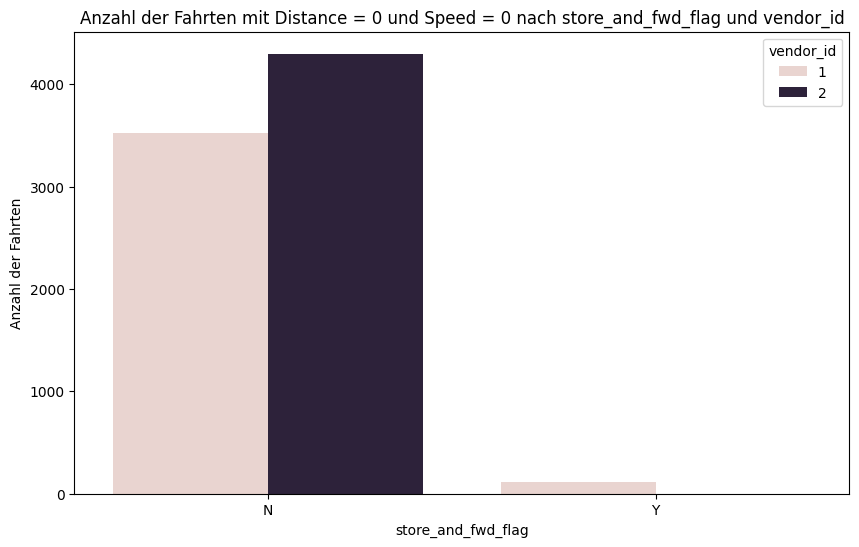

In [85]:
import seaborn as sns

# Filtern nach Fahrten, bei denen distance_km und speed_kmph gleich 0 sind
both_zero_distance_speed = df[(df['distance_km'] == 0) & (df['speed_kmph'] == 0)]

# Gruppierung nach store_and_fwd_flag und vendor_id und Zählen der Werte
both_zero_counts = both_zero_distance_speed.groupby(['store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellen des Balkendiagramms mit 'seaborn'
plt.figure(figsize=(10, 6))
sns.barplot(data=both_zero_counts, x='store_and_fwd_flag', y='count', hue='vendor_id')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit Distance = 0 und Speed = 0 nach store_and_fwd_flag und vendor_id')
plt.legend(title='vendor_id', loc='upper right')
plt.show()


In [87]:
df.speed_kmph.describe()

count    1.458644e+06
mean     1.442525e+01
std      1.497986e+01
min      0.000000e+00
25%      9.120000e+00
50%      1.279000e+01
75%      1.785000e+01
max      9.277710e+03
Name: speed_kmph, dtype: float64

In [91]:
df.speed_kmph.sort_values(ascending=False)

1176337    9277.71
910072     6874.22
184925     5638.68
974378     5253.64
377068     4090.85
            ...   
970159        0.00
1158791       0.00
1215406       0.00
970110        0.00
769060        0.00
Name: speed_kmph, Length: 1458644, dtype: float64

#### Anzahl der Fahrten mit einer Geschwindigkeit > 300 km/h

Anzahl der Fahrten mit einer Geschwindigkeit > 300 km/h: 42


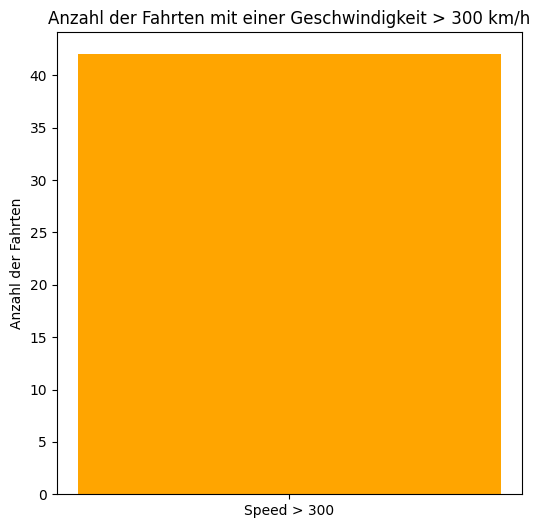

In [100]:
import matplotlib.pyplot as plt

# Filtern nach Fahrten, bei denen speed_kmph mehr als 300 ist
high_speed_trips = df[df['speed_kmph'] > 300]

# Anzahl der Fahrten mit speed_kmph mehr als 300
num_high_speed_trips = len(high_speed_trips)
print(f"Anzahl der Fahrten mit einer Geschwindigkeit > 300 km/h: {num_high_speed_trips}")
# Erstellen eines Balkendiagramms für die Anzahl der Fahrten mit speed_kmph > 300
plt.figure(figsize=(6, 6))
plt.bar(['Speed > 300'], [num_high_speed_trips], color='orange')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit einer Geschwindigkeit > 300 km/h')
plt.show()


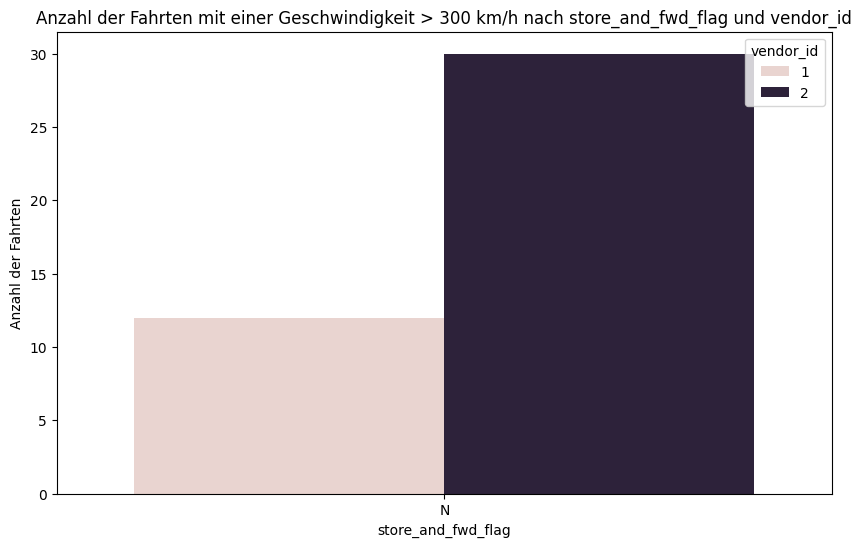

In [101]:
import seaborn as sns

# Filtern nach Fahrten, bei denen speed_kmph mehr als 300 ist
high_speed_trips = df[df['speed_kmph'] > 300]

# Gruppierung nach store_and_fwd_flag und vendor_id und Zählen der Werte
high_speed_counts = high_speed_trips.groupby(['store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellen des Balkendiagramms mit 'seaborn'
plt.figure(figsize=(10, 6))
sns.barplot(data=high_speed_counts, x='store_and_fwd_flag', y='count', hue='vendor_id')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten mit einer Geschwindigkeit > 300 km/h nach store_and_fwd_flag und vendor_id')
plt.legend(title='vendor_id', loc='upper right')
plt.show()


#### Anzahl der Fahrten pro Month nach vendor_id

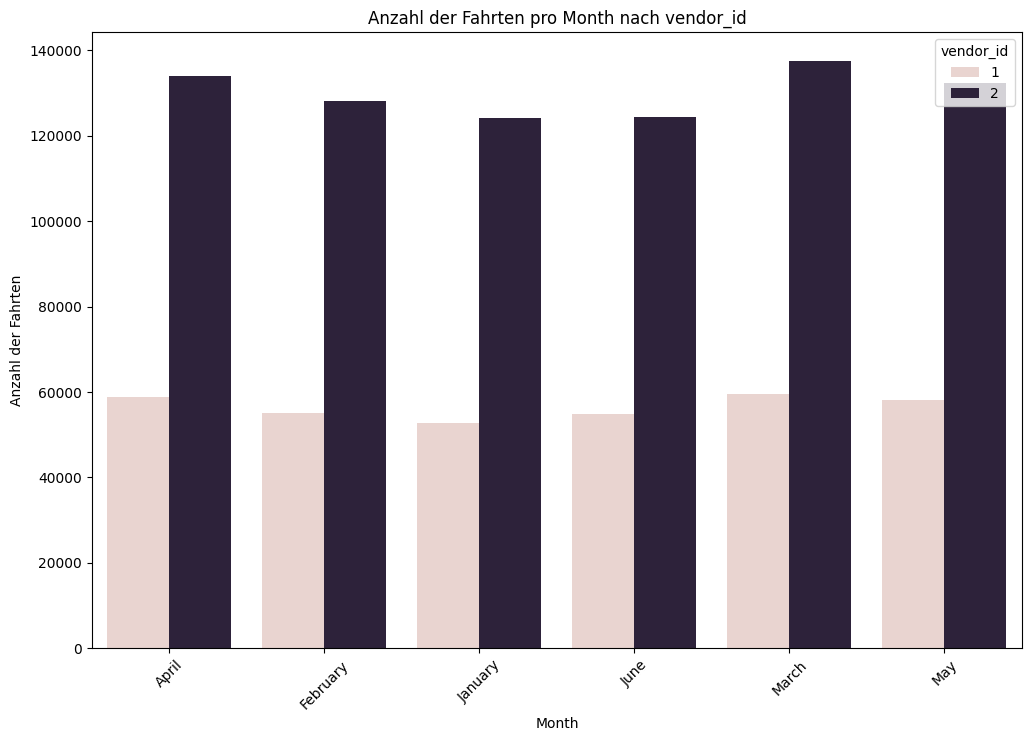

In [105]:
import seaborn as sns

# Konvertierung der 'pickup_datetime' in einen datetime-Datentyp und Extrahieren des Wochentags
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['Month'] = df['pickup_datetime'].dt.month_name()

# Erstellung eines DataFrames, der die Anzahl der Fahrten pro Wochentag, 'store_and_fwd_flag' und 'vendor_id' enthält
weekday_counts = df.groupby(['Month', 'store_and_fwd_flag', 'vendor_id']).size().reset_index(name='count')

# Erstellung des Balkendiagramms mit 'seaborn' unter Berücksichtigung von store_and_fwd_flag und vendor_id
plt.figure(figsize=(12, 8))
sns.barplot(data=weekday_counts, x='Month', y='count', hue='vendor_id', ci=None)
plt.xlabel('Month')
plt.ylabel('Anzahl der Fahrten')
plt.title('Anzahl der Fahrten pro Month nach vendor_id')
plt.legend(title='vendor_id', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [106]:
df.Month.describe()

count     1458644
unique          6
top         March
freq       256189
Name: Month, dtype: object

In [109]:
import pandas as pd

# Konvertierung der 'pickup_datetime' in einen datetime-Datentyp
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Funktion zur Einteilung in Tageszeiten
def get_time_interval(hour):
    if 6 <= hour < 12:
        return 'Morgen'
    elif 12 <= hour < 18:
        return 'Mittag'
    elif 18 <= hour < 24:
        return 'Abend'
    else:
        return 'Nacht'

# Erstellung einer neuen Spalte 'pickup_interval' basierend auf der Einteilung der Uhrzeiten
df['pickup_interval'] = df['pickup_datetime'].dt.hour.apply(get_time_interval)

# Anzeige der Ergebnisse
print(df[['pickup_datetime', 'pickup_interval']].head())


      pickup_datetime pickup_interval
0 2016-03-14 17:24:55          Mittag
1 2016-06-12 00:43:35           Nacht
2 2016-01-19 11:35:24          Morgen
3 2016-04-06 19:32:31           Abend
4 2016-03-26 13:30:55          Mittag


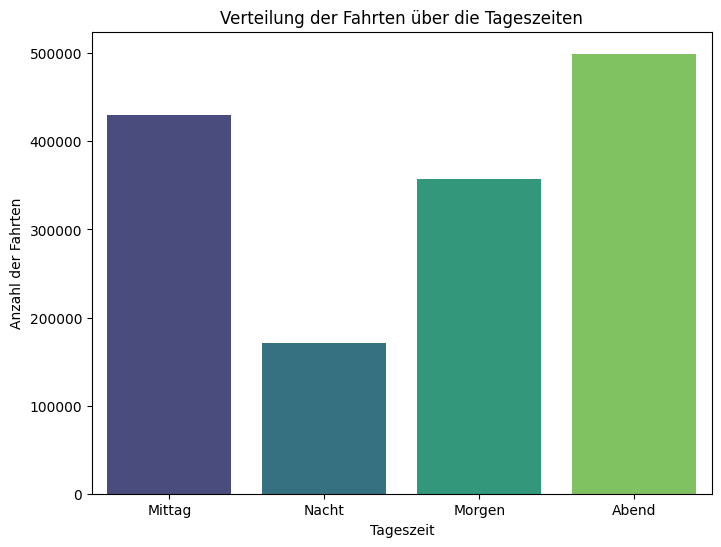

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellung des Diagramms für die Verteilung der Fahrten über die Tageszeiten
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='pickup_interval', palette='viridis')
plt.xlabel('Tageszeit')
plt.ylabel('Anzahl der Fahrten')
plt.title('Verteilung der Fahrten über die Tageszeiten')
plt.show()
